In [22]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator
from qiskit.quantum_info import Pauli
from scipy.optimize import minimize
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector
from math import sqrt


In [23]:

# Define the linear system Ax = b
coeffs = [0, 1, 0, 0]
paulis = ["II", "IZ", "ZI", "ZZ"]

A_sparse = SparsePauliOp(paulis, coeffs)
print(A_sparse)

b = np.array([1, 0, 0, 0])  # Right-hand side vector



SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ'],
              coeffs=[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])


In [24]:
# Define ansatz circuit (trial wavefunction)
def ansatz(params):
    circuit = QuantumCircuit(2)
    circuit.rx(params[0], 0)
    circuit.ry(params[1], 0)
    circuit.rz(params[2], 0)
    circuit.rx(params[3], 1)
    circuit.ry(params[4], 1)
    circuit.rz(params[5], 1)
    return circuit

# Cost function to minimize (based on expectation value)
def cost_function(params):
    circuit = ansatz(params)  # Ansatz circuit
    state = Statevector(circuit)  # Statevector of the ansatz circuit
    observable = A_sparse  # Operator A
    Ax_state = Statevector.evolve(state, observable)  # A|psi>
    b_state = Statevector(b).conjugate()  # |b>
    fidelity = b_state.inner(Ax_state)  # <b|A|psi>
    cost = abs(1 - fidelity)  # Cost function
    print("Parameters:", params, "Cost:", cost)
    return cost



In [25]:
# Optimization process
initial_params = np.random.rand(6)
result = minimize(cost_function, initial_params, method='COBYLA')
optimal_params = result.x

# Display results
print("Optimal parameters:", optimal_params)
# Final quantum state with optimized parameters
final_circuit = ansatz(optimal_params)
print("Optimized quantum circuit:")
print("Final quantum state:")
final_state = Statevector(final_circuit)
print(final_state)



Parameters: [0.8330547  0.0397293  0.38986043 0.57490334 0.88404555 0.67661485] Cost: 0.3966285592204082
Parameters: [1.8330547  0.0397293  0.38986043 0.57490334 0.88404555 0.67661485] Cost: 0.5383328130711891
Parameters: [0.8330547  1.0397293  0.38986043 0.57490334 0.88404555 0.67661485] Cost: 0.30921182580712353
Parameters: [0.8330547  1.0397293  1.38986043 0.57490334 0.88404555 0.67661485] Cost: 0.6076936832637415
Parameters: [0.8330547  1.0397293  0.38986043 1.57490334 0.88404555 0.67661485] Cost: 0.4386441994827671
Parameters: [0.8330547  1.0397293  0.38986043 0.57490334 1.88404555 0.67661485] Cost: 0.5065473570297921
Parameters: [0.8330547  1.0397293  0.38986043 0.57490334 0.88404555 1.67661485] Cost: 0.6076936832637414
Parameters: [ 0.55600026  1.21064297 -0.19371927  0.32184238  0.49822307  0.09303515] Cost: 0.33921780447623445
Parameters: [1.31563368 1.06300163 0.31039775 0.54044549 0.83151033 0.59715217] Cost: 0.3432580699518863
Parameters: [0.73729359 1.08080683 0.24960241 0

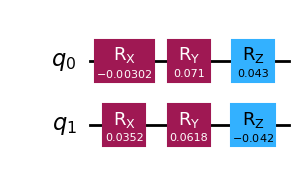

In [26]:
# Draw the final circuit
final_circuit.draw(output='mpl')



In [27]:
# Evolve the final state with A_sparse
final_state.evolve(A_sparse)



Statevector([ 0.99873688+2.08747607e-06j, -0.03536531-3.03075553e-03j,
              0.03010322-1.88930894e-02j, -0.00112329+5.77656364e-04j],
            dims=(2, 2))


In [28]:
# Define b_state
b_state = Statevector(b)
print(b_state)



Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [29]:
# Solving the linear system using scipy
x = np.linalg.solve(A_sparse.to_matrix(), b)
print("Exact solution:", x)

Exact solution: [1.+0.j 0.-0.j 0.+0.j 0.-0.j]
